In [6]:
import pandas as pd


# Load cleaned accident data with traffic
accident_data = pd.read_csv('cleaned_accident_data_with_traffic.csv')
# Print the first 5 rows of the accident_data DataFrame

   pk_teuna_fikt  thum_geografi  sug_dereh  semel_yishuv  rehov1  rehov2  \
0   2.014000e+09            1.0        4.0           0.0     NaN     NaN   
1   2.014000e+09            1.0        3.0           0.0     NaN     NaN   
2   2.014000e+09            1.0        4.0           0.0     NaN     NaN   
3   2.014000e+09            1.0        3.0           0.0     NaN     NaN   
4   2.014000e+09            1.0        3.0           0.0     NaN     NaN   

   bayit  zomet_ironi  kvish1  kvish2  ...  kivun_haziya  mahoz  nafa  \
0    NaN          NaN    20.0     0.0  ...           2.0    5.0  53.0   
1    NaN          NaN    71.0   669.0  ...           9.0    2.0  32.0   
2    NaN          NaN    40.0     0.0  ...           9.0    6.0  61.0   
3    NaN          NaN    65.0     0.0  ...           9.0    3.0  32.0   
4    NaN          NaN  4314.0     0.0  ...           9.0    4.0  31.0   

   ezor_tivi  maamad_minizipali  zurat_ishuv  status_igun         x         y  \
0      513.0           

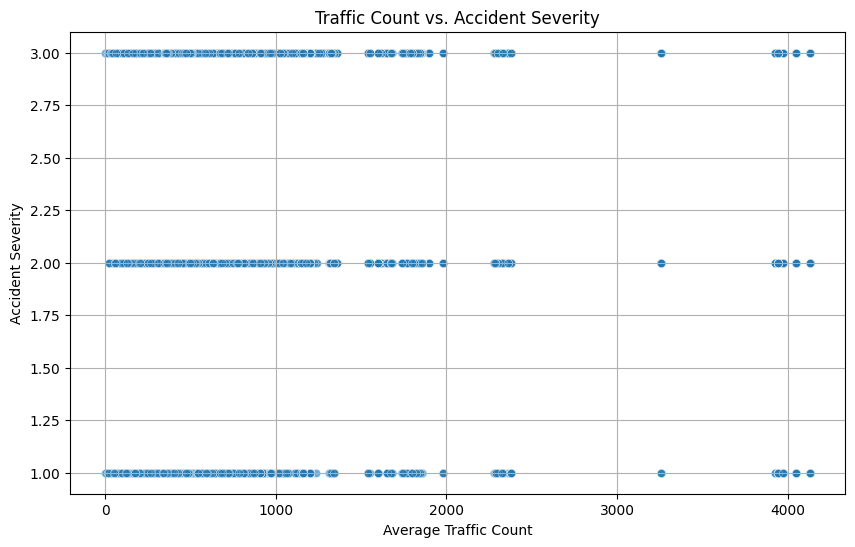

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned accident data with traffic
accident_data = pd.read_csv('cleaned_accident_data_with_traffic.csv')

# Print the first 5 rows of the accident_data DataFrame
print(accident_data.head())

# 1. Scatter Plot: Traffic Count vs. Accident Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_traffic_count', y='humrat_teuna', data=accident_data, alpha=0.6)
plt.title('Traffic Count vs. Accident Severity')
plt.xlabel('Average Traffic Count')
plt.ylabel('Accident Severity')
plt.grid(True)
plt.show()


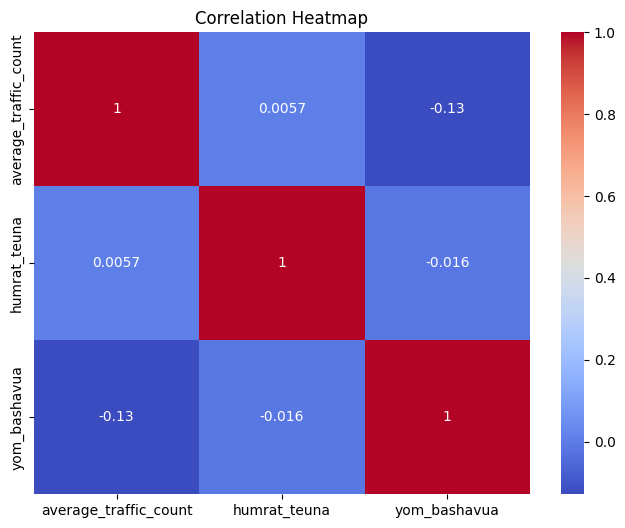

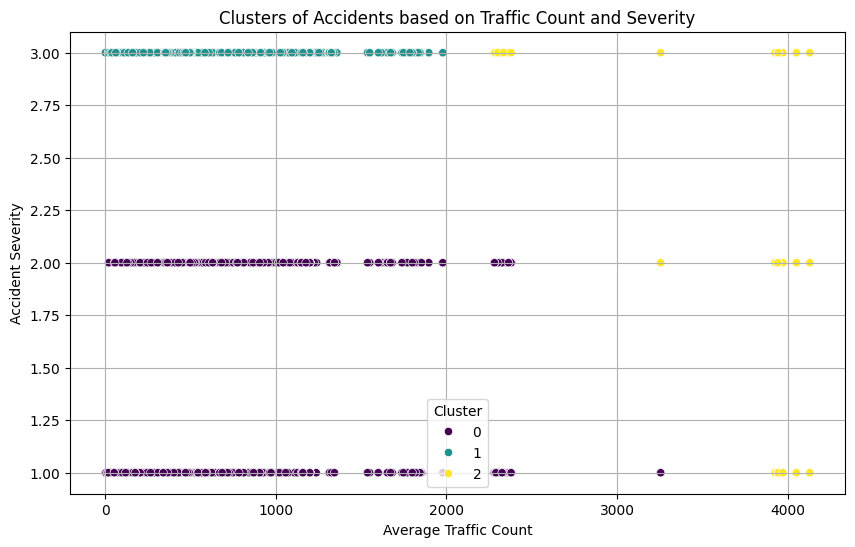

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the cleaned accident data with traffic
accident_data = pd.read_csv('cleaned_accident_data_with_traffic.csv')

# Correlation Analysis
corr_matrix = accident_data[['average_traffic_count', 'humrat_teuna', 'yom_bashavua']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Prepare data for clustering (using traffic count and severity)
X = accident_data[['average_traffic_count', 'humrat_teuna']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
accident_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_traffic_count', y='humrat_teuna', hue='Cluster', data=accident_data, palette='viridis')
plt.title('Clusters of Accidents based on Traffic Count and Severity')
plt.xlabel('Average Traffic Count')
plt.ylabel('Accident Severity')
plt.grid(True)
plt.show()


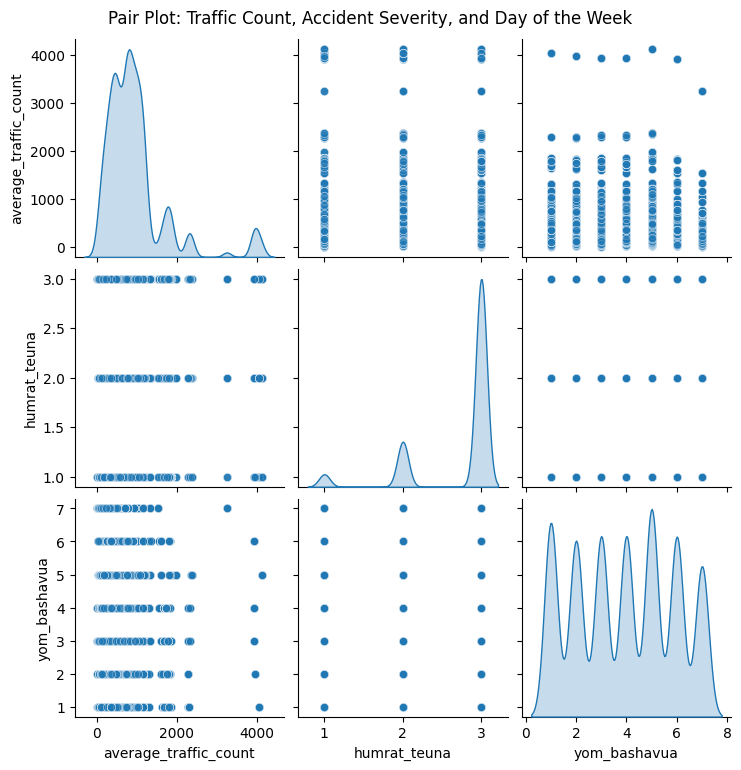

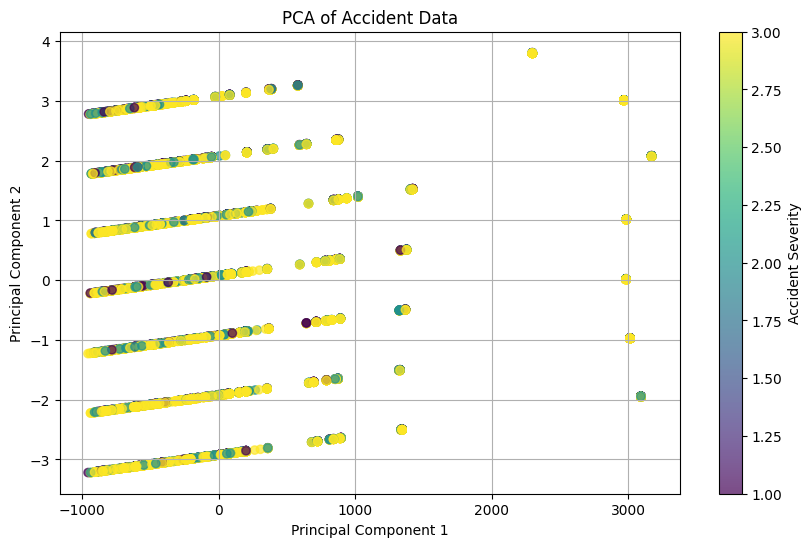

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load cleaned accident data with traffic
accident_data = pd.read_csv('cleaned_accident_data_with_traffic.csv')

# Select relevant columns for multivariate analysis
selected_columns = ['average_traffic_count', 'humrat_teuna', 'yom_bashavua']

# Pairplot for detailed multivariate analysis
sns.pairplot(accident_data[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot: Traffic Count, Accident Severity, and Day of the Week', y=1.02)
plt.show()

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(accident_data[selected_columns].fillna(0))

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=accident_data['humrat_teuna'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Accident Severity')
plt.title('PCA of Accident Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



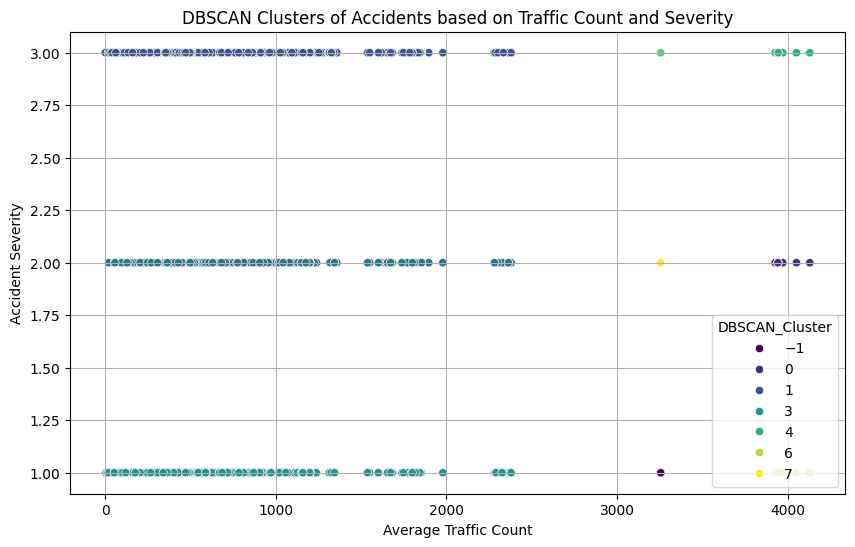

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare data for DBSCAN clustering
X = accident_data[['average_traffic_count', 'humrat_teuna']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
accident_data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_traffic_count', y='humrat_teuna', hue='DBSCAN_Cluster', data=accident_data, palette='viridis')
plt.title('DBSCAN Clusters of Accidents based on Traffic Count and Severity')
plt.xlabel('Average Traffic Count')
plt.ylabel('Accident Severity')
plt.grid(True)
plt.show()


In [12]:
%pip install statsmodels
import statsmodels.api as sm

# Prepare the data for regression analysis
X = accident_data[['average_traffic_count', 'yom_bashavua']]
y = accident_data['humrat_teuna']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.0/9.9 MB 487.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.9 MB 901.1 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.9 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.9 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.9 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.9 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/9.9 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.9 MB 6.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.9 MB 6.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.5/9.9 MB 7.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.9 MB 7.6 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\mousa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:           humrat_teuna   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.193
Date:                Mon, 26 Aug 2024   Prob (F-statistic):             0.0411
Time:                        23:04:39   Log-Likelihood:                -19866.
No. Observations:               24950   AIC:                         3.974e+04
Df Residuals:                   24947   BIC:                         3.976e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.75

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the cleaned accident data with traffic
accident_data = pd.read_csv('cleaned_accident_data_with_traffic.csv')

# Select features and target variable
X = accident_data[['average_traffic_count', 'yom_bashavua']]
y = accident_data['humrat_teuna']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7607214428857716
Decision Tree Confusion Matrix:
 [[   4   12  343]
 [  12   49 1253]
 [  37  134 5641]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         1.0       0.08      0.01      0.02       359
         2.0       0.25      0.04      0.06      1314
         3.0       0.78      0.97      0.86      5812

    accuracy                           0.76      7485
   macro avg       0.37      0.34      0.32      7485
weighted avg       0.65      0.76      0.68      7485



In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7665998663994656
Random Forest Confusion Matrix:
 [[   2    8  349]
 [   9   32 1273]
 [  27   81 5704]]
Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.05      0.01      0.01       359
         2.0       0.26      0.02      0.04      1314
         3.0       0.78      0.98      0.87      5812

    accuracy                           0.77      7485
   macro avg       0.37      0.34      0.31      7485
weighted avg       0.65      0.77      0.68      7485



In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7760855043420174
Gradient Boosting Confusion Matrix:
 [[   1    0  358]
 [   0    2 1312]
 [   2    4 5806]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         1.0       0.33      0.00      0.01       359
         2.0       0.33      0.00      0.00      1314
         3.0       0.78      1.00      0.87      5812

    accuracy                           0.78      7485
   macro avg       0.48      0.33      0.29      7485
weighted avg       0.68      0.78      0.68      7485



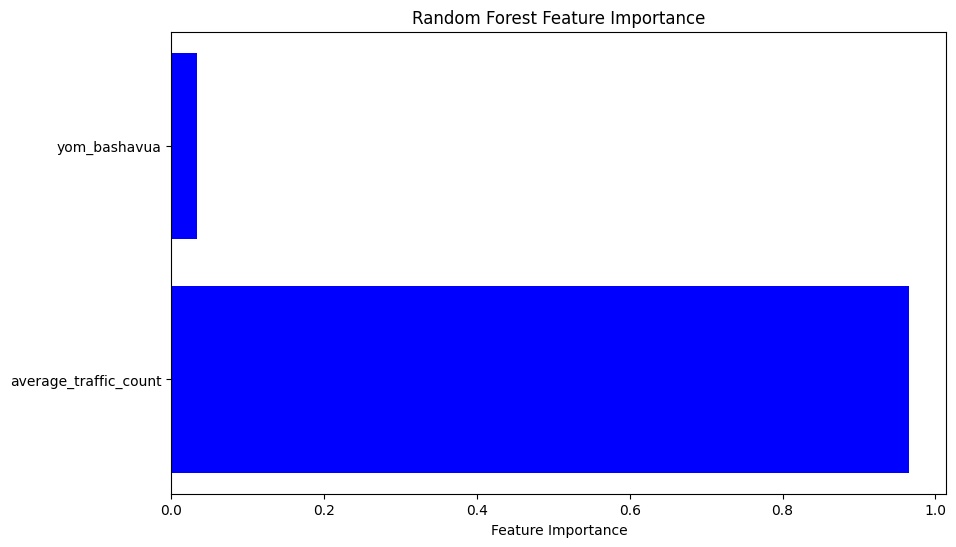

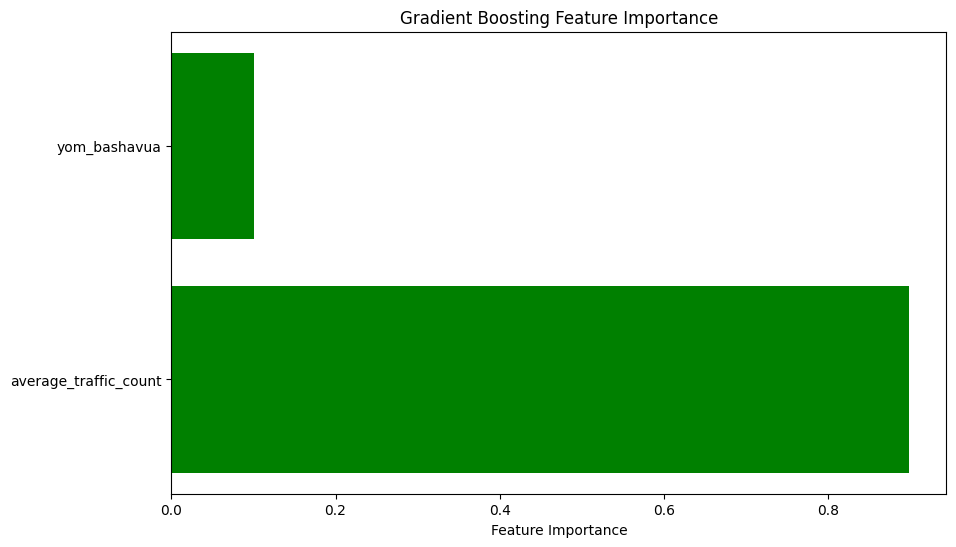

In [18]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances_rf = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances_rf, color='blue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Feature importance from Gradient Boosting
importances_gb = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, importances_gb, color='green')
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance')
plt.show()


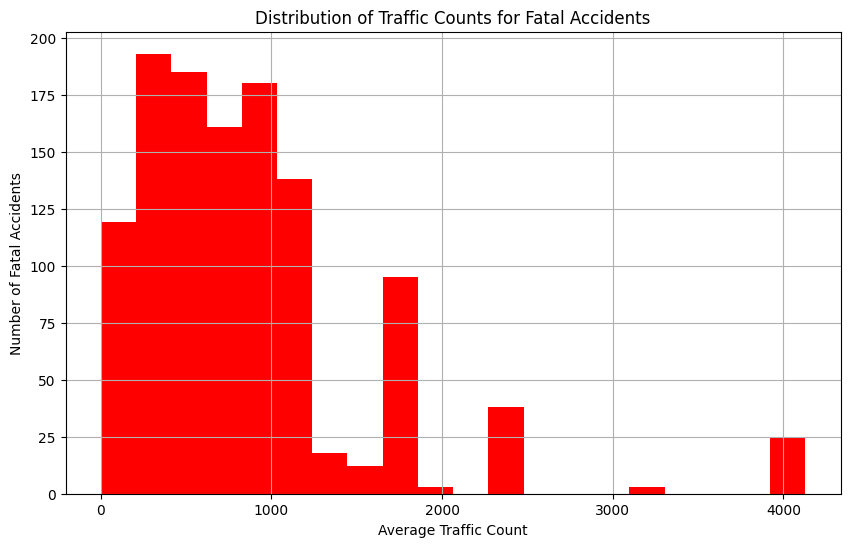

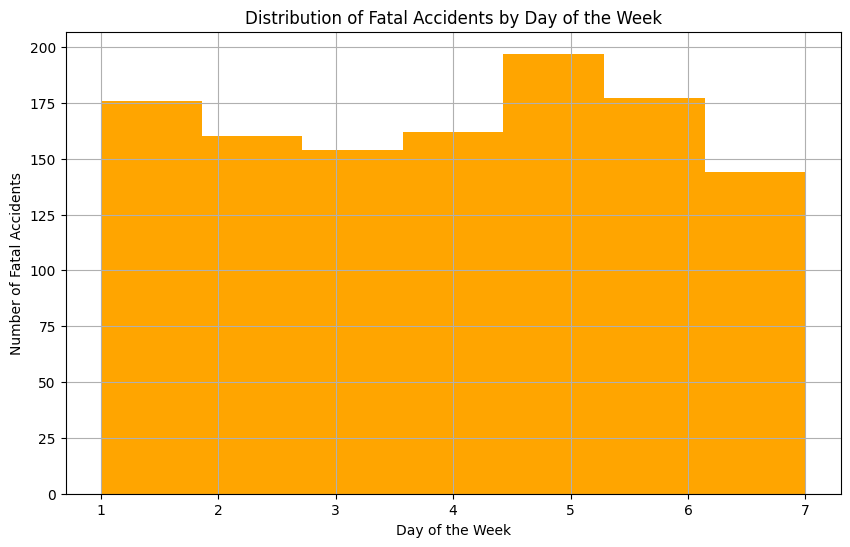

Random Forest Accuracy: 0.9497661990647963
Random Forest Confusion Matrix:
 [[7108   18]
 [ 358    1]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      7126
           1       0.05      0.00      0.01       359

    accuracy                           0.95      7485
   macro avg       0.50      0.50      0.49      7485
weighted avg       0.91      0.95      0.93      7485



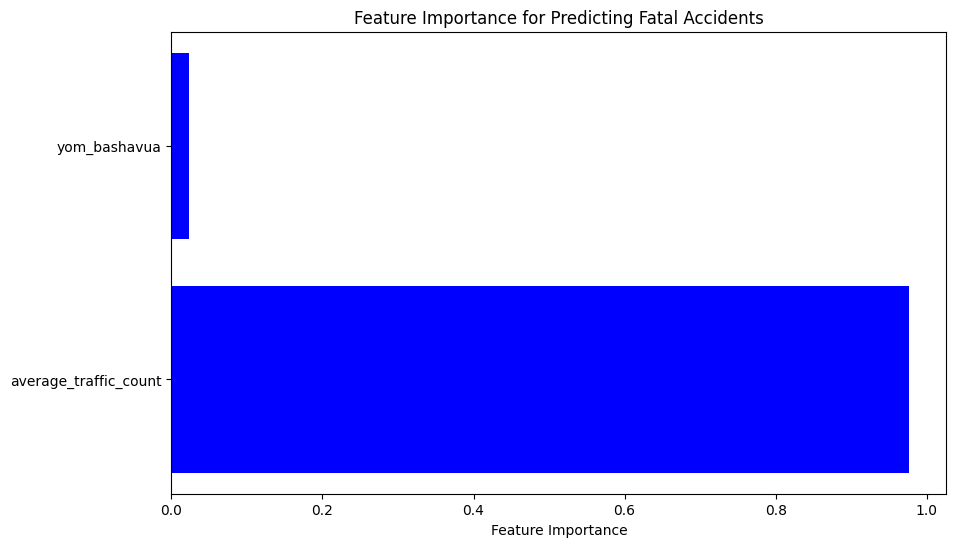

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the cleaned accident data with traffic
accident_data = pd.read_csv('cleaned_accident_data_with_traffic.csv')

# Filter the data to only include fatal accidents (severity 1)
fatal_accidents = accident_data[accident_data['humrat_teuna'] == 1]

# Plot: Distribution of Traffic Counts for Fatal Accidents
plt.figure(figsize=(10, 6))
plt.hist(fatal_accidents['average_traffic_count'], bins=20, color='red')
plt.title('Distribution of Traffic Counts for Fatal Accidents')
plt.xlabel('Average Traffic Count')
plt.ylabel('Number of Fatal Accidents')
plt.grid(True)
plt.show()

# Plot: Distribution of Fatal Accidents by Day of the Week
plt.figure(figsize=(10, 6))
plt.hist(fatal_accidents['yom_bashavua'], bins=7, color='orange')
plt.title('Distribution of Fatal Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fatal Accidents')
plt.grid(True)
plt.show()

# Prepare the data for modeling
X = accident_data[['average_traffic_count', 'yom_bashavua']]
y = (accident_data['humrat_teuna'] == 1).astype(int)  # Binary target: 1 if fatal, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='blue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Fatal Accidents')
plt.show()
